In [23]:
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))


import Activation
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import copy

plt.rcParams['figure.figsize'] = [7, 6]
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Times New Roman'

import importlib
importlib.reload(Activation)

/var/folders/g2/wbtqb3xs5ll9pqwt151g32500000gp/T/ipykernel_50887/1694294259.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<module 'Activation' from '/Users/brianlenardo/Research/nEXO/ActivatedXenonCalibrations/ActivationCalculation/Activation.py'>

Isotope: Xe131	Reaction: n
Isotope: Xe137	Reaction: nonel
Isotope: Mo92	Reaction: ng
Isotope: Xe131	Reaction: n
Isotope: Xe131	Reaction: ng
Isotope: Xe129	Reaction: n
Isotope: Xe131	Reaction: n
Isotope: Ni58	Reaction: np
Isotope: Xe131	Reaction: n
Isotope: Xe129	Reaction: n
Isotope: Ni62	Reaction: ng
Isotope: Xe125	Reaction: nonel
Isotope: Ni60	Reaction: np
Isotope: Xe131	Reaction: nonel
Isotope: Si30	Reaction: ng
Isotope: Xe129	Reaction: n
Isotope: Xe131	Reaction: n
Isotope: Xe131	Reaction: n
Isotope: S34	Reaction: ng
Isotope: Xe130	Reaction: ng
Isotope: Xe131	Reaction: n
Isotope: Xe128	Reaction: nonel
Isotope: Xe129	Reaction: n
Isotope: Ni64	Reaction: ng
Isotope: Xe129	Reaction: ng
Isotope: Xe125	Reaction: ng
Isotope: Mo98	Reaction: ng
Isotope: Xe131	Reaction: n
Isotope: Mo100	Reaction: ng
Isotope: Xe130	Reaction: nonel
Isotope: Xe131	Reaction: n
Isotope: Xe124	Reaction: nonel
Isotope: C13	Reaction: ng
Isotope: P31	Reaction: ng
Isotope: Xe125	Reaction: ninel
Isotope: Xe127	Reaction: 

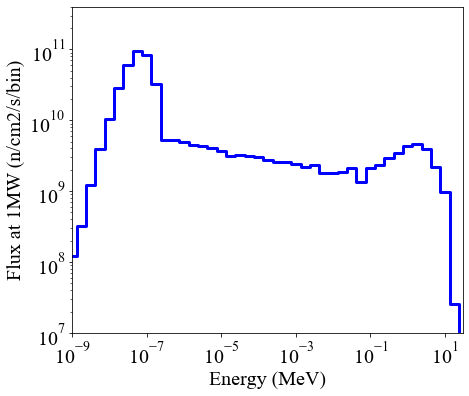

In [24]:
nucdata = Activation.LoadAllData()
mnrcspec = Activation.LoadMNRCSpectrum()

# The flux assumes a power of 1MW, so we need to manually scale it 
# for the particular use case.
mnrcspec['Flux'] = mnrcspec['Flux']*0.25 # Here we correct to 250 kW

# Save a copy of the 1MW spectrum just in case
mnrcspec_unscaled = copy.copy(mnrcspec)
mnrcspec_unscaled['Flux'] = mnrcspec['Flux']/0.25


plt.step(10**(bins_log + bin_log_width/2.),mnrcspec['Flux']/0.25,'-b',linewidth=3)
#plt.step(10**(bins_log),mnrcspec['Flux']/0.25,'-r',linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Flux at 1MW (n/cm2/s/bin)')
plt.xlim(1.e-9,30.)
plt.ylim(1e7,4e11)
plt.savefig('mnrc_neutron_flux_spectrum_02.png',dpi=300)

Flux between 1.000E-10 and 5.620E-07
8.033E+10
Flux between 5.620E-07 and 5.620E-02
1.626E+10
Flux between 5.620E-02 and 3.160E+01
6.200E+09
Total flux: 4.112E+11


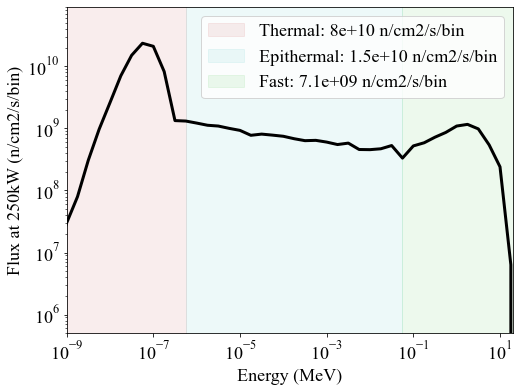

In [38]:

print('Flux between {:.3E} and {:.3E}'.format(mnrcspec['Energy'][0],mnrcspec['Energy'][15]))
print('{:.3E}'.format(np.sum(mnrcspec['Flux'][0:15])))
print('Flux between {:.3E} and {:.3E}'.format(mnrcspec['Energy'][15],mnrcspec['Energy'][35]))
print('{:.3E}'.format(np.sum(mnrcspec['Flux'][15:37])))
print('Flux between {:.3E} and {:.3E}'.format(mnrcspec['Energy'][35],mnrcspec['Energy'][len(mnrcspec)-1]))
print('{:.3E}'.format(np.sum(mnrcspec['Flux'][37:])))
print('Total flux: {:.3E}'.format(np.sum(mnrcspec['Flux'])*4.))

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 18})

import copy



plt.plot(mnrcspec['Energy'],mnrcspec['Flux'],'-k',linewidth=3,label='')
xmin_th = np.ones(10)*(mnrcspec['Energy'][0])
xmax_th = np.ones(10)*(mnrcspec['Energy'][15])
xmax_eth = np.ones(10)*(mnrcspec['Energy'][35])
xmax_fast = np.ones(10)*(mnrcspec['Energy'][len(mnrcspec)-1])
yvals = np.logspace(5.,11.,10)
plt.xscale('log')
plt.yscale('log')
plt.fill_betweenx(yvals,xmin_th,xmax_th,color=(0.7,0.,0.,0.07),\
                  label='Thermal: {:3.2} n/cm2/s/bin'.format(np.sum(mnrcspec['Flux'][0:15])))
plt.fill_betweenx(yvals,xmax_th,xmax_eth,color=(0.,0.7,0.7,0.07),\
                  label='Epithermal: {:3.2} n/cm2/s/bin'.format(np.sum(mnrcspec['Flux'][15:35])))
plt.fill_betweenx(yvals,xmax_eth,xmax_fast,color=(0.,0.7,0.,0.07),\
                  label='Fast: {:3.2} n/cm2/s/bin'.format(np.sum(mnrcspec['Flux'][35:])))
plt.axis([1.e-9,20.,5.e5,9.e10])
plt.legend(loc='upper right')

plt.xlabel('Energy (MeV)')
plt.ylabel('Flux at 250kW (n/cm2/s/bin)')
plt.savefig('mnrc_neutron_flux_spectrum_shaded_regions.png',dpi=300)


# First calculations of 127Xe production

{'ng':              1e-11     174.978
0     1.103040e-11  166.605000
1     1.216690e-11  158.633000
2     1.342060e-11  151.042000
3     1.480340e-11  143.814000
4     1.632870e-11  136.933000
...            ...         ...
1968  1.900000e+01    0.001249
1969  1.926810e+01    0.001259
1970  1.953990e+01    0.001269
1971  1.981560e+01    0.001280
1972  2.000000e+01    0.001286

[1973 rows x 2 columns]}


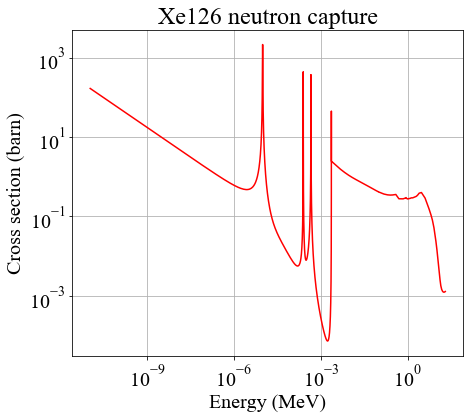

In [26]:
print(nucdata['Xe126'])

plt.plot(nucdata['Xe126']['ng'].iloc[:,0],\
         nucdata['Xe126']['ng'].iloc[:,1],\
        '-r')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Cross section (barn)')
plt.title('Xe126 neutron capture')
plt.grid()
plt.savefig('xe127_neutron_capture_cross_section.png',dpi=300)



Creation int: 2.18599e-12
         Energy      CIF_(Al)    PTS_(Void)        Flux
0  1.000000e-10  1.630000e+07  0.000000e+00         0.0
1  1.780000e-10  4.520000e+07  0.000000e+00         0.0
2  3.160000e-10  2.280000e+08  0.000000e+00   1072500.0
3  5.620000e-10  7.040000e+08  2.510000e+07   7950000.0
4  1.000000e-09  3.040000e+09  2.980000e+09  30000000.0


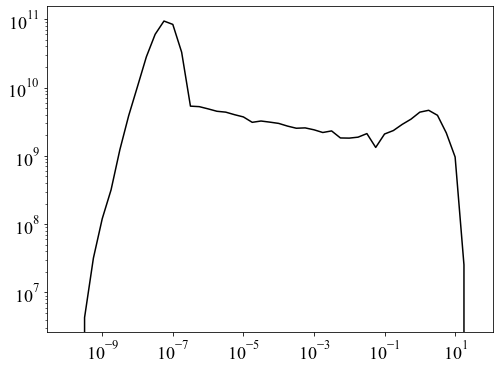

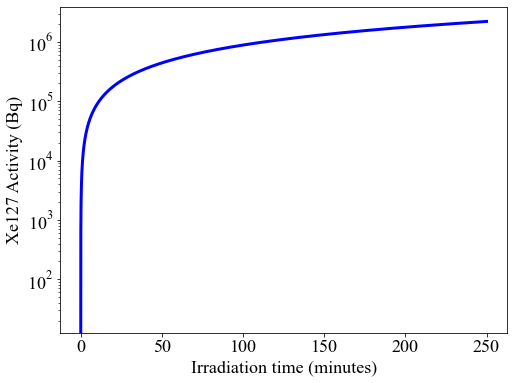

In [35]:
# Calculate the production of 127Xe


# Assume 75g of xenon.
N126_0 = 75./131. * 0.00089 * 6.02e23
N127_0 = 0.
tau127 = 36.3 / np.log(2.) * 24. * 60 * 60. 

time = np.linspace(0.,15000.,100000)
dt = time[2]-time[1]

N127 = np.zeros(len(time))


plt.figure(2)
plt.plot(mnrcspec_unscaled['Energy'],mnrcspec_unscaled['Flux'],'-k')
plt.xscale('log')
plt.yscale('log')

plt.figure(1)

creation_int, bin_by_bin = Activation.InterpolateAndIntegrateAvg( nucdata['Xe126']['ng'], mnrcspec_unscaled )
print('Creation int: {:6.6}'.format(creation_int))

for i in range(1,len(time)):
  term1 = -N127[i-1]/tau127
  term2 = N126_0 * creation_int
#  term3 = -N127[i-1] * destruction_int
  N127[i] = N127[i-1] + dt * (term1 + term2)
 # print(N127[i])

plt.figure(1)
#plt.plot(time/60.,N127/tau127/(3.7e10)*1e6,'-b')
plt.plot(time/60.,N127/tau127,'-b',linewidth=3)
plt.xlabel('Irradiation time (minutes)')
plt.ylabel('Xe127 Activity (Bq)')
plt.title('')
plt.xscale('linear')
plt.yscale('log')
#plt.axis([0.,50.,1.e-1,1.e2])   
plt.savefig('xe127_mnrc_activation_vs_time.png',dpi=300)
print(mnrcspec.head())

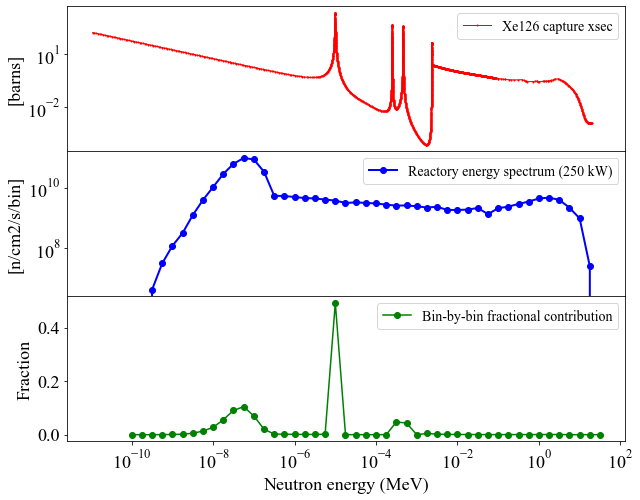

In [37]:
# See how the various neutron energies contribute to the total production rate


plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 18})


fig, ax = plt.subplots(ncols=1,nrows=3,sharex=True,gridspec_kw={'hspace':0.})

ax[1].plot(mnrcspec['Energy'],mnrcspec['Flux']/0.25,'-ob',\
           linewidth=2,markersize=6,label='Reactory energy spectrum (250 kW)')
ax[0].plot(nucdata['Xe126']['ng'].iloc[:,0],\
         nucdata['Xe126']['ng'].iloc[:,1],\
        '-or',markersize=1,linewidth=1,label='Xe126 capture xsec')
ax[2].plot(mnrcspec['Energy'],bin_by_bin/np.sum(bin_by_bin),'-og',\
           label='Bin-by-bin fractional contribution')
plt.xscale('log')
plt.yscale('log')

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('linear')
ax[2].set_xscale('log')
for i in range(3):
    ax[i].legend(fontsize=14)
ax[2].set_xlabel('Neutron energy (MeV)')
ax[0].set_ylabel('[barns]')
ax[1].set_ylabel('[n/cm2/s/bin]')
ax[2].set_ylabel('Fraction')
    
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 18})

# Irradiation of stainless steel

Let's assume we irradiate for 1 hour. What will be the specfic activity of the various isotopes?

In [40]:
stainless_table = pd.read_csv('./Element tables - 316L Stainless.csv')

#stainless_table.loc[stainless_table['Element']=='P'].head()
stainless_table.head(n=30)

,Element,Element fraction,A,Isotope fraction,Reaction,Capture daughter,Daughter halflife (s),Daughter radiation,Daughter energy (keV),Daughter decay product,DDP A
0,Fe,0.65545,54,0.05850,ng,55,8.609328e+07,EC,6.0,Mn,55.0
1,Fe,0.65545,56,0.91750,ng,57,inf,None,0.0,None,0.0
2,Fe,0.65545,57,0.02120,ng,58,inf,None,0.0,None,0.0
3,Fe,0.65545,58,0.00280,ng,59,3.853440e+06,B,1100.0,Co,59.0
4,N,0.00100,14,0.99600,ng,15,inf,None,0.0,None,0.0
5,N,0.00100,15,0.00400,ng,16,7.130000e+00,B,6000.0,O,16.0
6,Ni,0.12000,58,0.68077,np,58,6.122304e+06,EC,800.0,Co,58.0
7,Ni,0.12000,60,0.26223,np,60,1.662389e+08,B,1300.0,Co,60.0
8,Ni,0.12000,61,0.01140,ng,62,inf,None,0.0,None,0.0
9,Ni,0.12000,62,0.03635,ng,63,3.153600e+09,B,66.0,Cu,63.0


In [41]:

# N will store the number-of-atoms for each isotope of interest
NSteel = dict()
SpecActivitySteel = dict()

# How many atoms per gram of stainless steel?
ss316L_molarmass = np.sum(stainless_table['Element fraction'] * stainless_table['A'] * stainless_table['Isotope fraction'])
print('Molar mass of stainless steel: {} g/mol'.format(ss316L_molarmass))
ss316L_molperg = 1./ss316L_molarmass
    

# The time array gives us the points on which to calculate the activation equation
time = np.linspace(0.,900.,20000)
dt = time[2]-time[1]
    


Molar mass of stainless steel: 56.41755227999999 g/mol


In [42]:
# This block calculates the specific activities in Bq/g

for index, row in stainless_table.iterrows():

    if 'None' in row['Daughter radiation']: continue
    if row['Daughter halflife (s)'] < 60.*60.: continue

    
    if row['Reaction'] == 'ng':
    
        isotope = '{}{}'.format(row['Element'],row['A'])
        daughter = '{}{}'.format(row['Element'],row['A']+1)
        print('Running calculation for {} (Daughter: {})'.format(isotope,daughter))

        NSteel[daughter] = np.zeros(len(time))
        SpecActivitySteel[daughter] = np.zeros(len(time))
    
        creation_int, bin_by_bin = Activation.InterpolateAndIntegrateAvg( nucdata[isotope]['ng'], mnrcspec )
    
        N_parent_0 = ss316L_molperg * 6.02e23 * row['Isotope fraction'] * row['Element fraction']
    
        for i in range(1,len(time)):
            term1 = -NSteel[daughter][i-1]/(row['Daughter halflife (s)']/np.log(2))
            term2 = N_parent_0 * creation_int
            NSteel[daughter][i] = NSteel[daughter][i-1] + dt * (term1 + term2)
            SpecActivitySteel[daughter][i] = NSteel[daughter][i] / (row['Daughter halflife (s)']/np.log(2))
    
    if row['Reaction'] == 'np':
        
        isotope = '{}{}'.format(row['Element'],row['A'])
        daughter = '{}{}'.format(row['Daughter decay product'],row['A'])
        print('Running calculation for {} (Daughter: {})'.format(isotope,daughter))

        NSteel[daughter] = np.zeros(len(time))
        SpecActivitySteel[daughter] = np.zeros(len(time))
    
        creation_int, bin_by_bin = Activation.InterpolateAndIntegrateAvg( nucdata[isotope]['np'], mnrcspec )
    
        N_parent_0 = ss316L_molperg * 6.02e23 * row['Isotope fraction'] * row['Element fraction']
    
        for i in range(1,len(time)):
            term1 = -NSteel[daughter][i-1]/(row['Daughter halflife (s)']/np.log(2))
            term2 = N_parent_0 * creation_int
            NSteel[daughter][i] = NSteel[daughter][i-1] + dt * (term1 + term2)
            SpecActivitySteel[daughter][i] = NSteel[daughter][i] / (row['Daughter halflife (s)']/np.log(2))            
    

Running calculation for Fe54 (Daughter: Fe55)
Running calculation for Fe58 (Daughter: Fe59)
Running calculation for Ni58 (Daughter: Co58)
Running calculation for Ni60 (Daughter: Co60)
Running calculation for Ni62 (Daughter: Ni63)
Running calculation for Ni64 (Daughter: Ni65)
Running calculation for Mo92 (Daughter: Mo93)
Running calculation for Mo98 (Daughter: Mo99)
Running calculation for Cr50 (Daughter: Cr51)
Running calculation for S34 (Daughter: S35)
Running calculation for P31 (Daughter: P32)
Running calculation for Si30 (Daughter: Si31)
Running calculation for C13 (Daughter: C14)
Running calculation for Co59 (Daughter: Co60)


In [43]:
print(NSteel.keys())

dict_keys(['Fe55', 'Fe59', 'Co58', 'Co60', 'Ni63', 'Ni65', 'Mo93', 'Mo99', 'Cr51', 'S35', 'P32', 'Si31', 'C14'])


Text(0, 0.5, 'Number of atoms of given isotope')

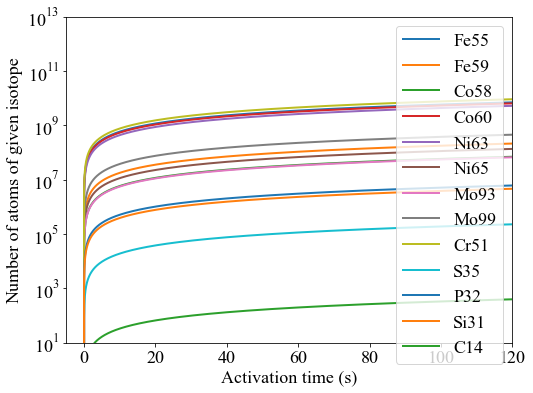

In [44]:
for isotope in NSteel.keys():
    plt.plot(time,NSteel[isotope],linewidth=2,label=isotope)

plt.yscale('log')
plt.axis([-5.,120.,10.,1.e13])
plt.legend(loc='upper right')

plt.xlabel('Activation time (s)')
plt.ylabel('Number of atoms of given isotope')

Text(0, 0.5, 'Specific activity (Bq/g)')

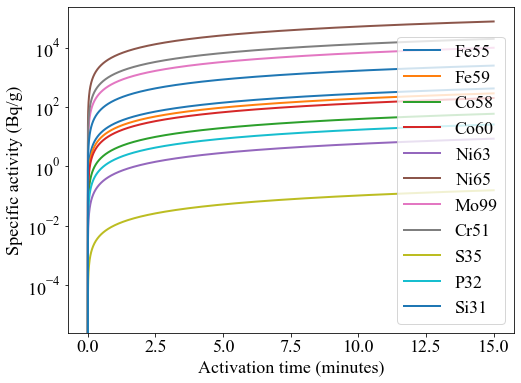

In [48]:
for isotope in NSteel.keys():
    if np.max(SpecActivitySteel[isotope]) < 0.01: continue
    plt.plot(time/60.,SpecActivitySteel[isotope],linewidth=2,label=isotope)

plt.yscale('log')
plt.legend(loc='lower right')
plt.xlabel('Activation time (minutes)')
plt.ylabel('Specific activity (Bq/g)')

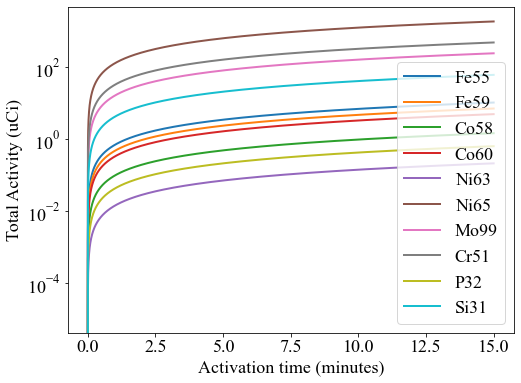

In [46]:
bottle_mass = 924. # grams
Bq_per_uCi = 3.7e10 * 1e-6

for isotope in NSteel.keys():
    if np.max(SpecActivitySteel[isotope]) < 1.: continue
    plt.plot(time/60.,SpecActivitySteel[isotope] * bottle_mass / Bq_per_uCi,linewidth=2,label=isotope)

plt.yscale('log')
plt.legend(loc='lower right')
plt.xlabel('Activation time (minutes)')
plt.ylabel('Total Activity (uCi)')
plt.savefig('total_activity_stainless_924g_bottle_2min_irrad.png',dpi=300)

## Calculate activity for Xe

Now, I'll do the same calculation for the xenon inside the bottle.




In [49]:
xe_table = pd.read_csv('./Element tables - natXe.csv')

xe_table.head(n=len(xe_table))

,Element,Element fraction,A,Isotope fraction,Capture daughter,Daughter halflife (s),Daughter radiation,Daughter energy (keV),Daughter decay product,DDP A
0,Xe,1,124,0.00095,125,60840.0,EC,300,I,125
1,Xe,1,126,0.00089,127,3140208.0,EC,400,I,127
2,Xe,1,128,0.01910,129,inf,None,0,None,0
3,Xe,1,129,0.26401,130,inf,None,0,None,0
4,Xe,1,130,0.04071,131,inf,None,0,None,0
5,Xe,1,131,0.21232,132,inf,None,0,None,0
6,Xe,1,132,0.26909,133,453340.8,B,80,Cs,133
7,Xe,1,134,0.10436,135,32904.0,B,0,Cs,135
8,Xe,1,136,0.08570,137,228.0,B,600,Cs,137


In [50]:
# Replace the Xe-137 info with Cs-137, which will stick around after all the Xe-137 decays quickly away.
xe_table['Daughter halflife (s)'].iloc[8] = 951441120



/var/folders/g2/wbtqb3xs5ll9pqwt151g32500000gp/T/ipykernel_50887/2513444631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xe_table['Daughter halflife (s)'].iloc[8] = 951441120


In [51]:

# N will store the number-of-atoms for each isotope of interest
NXe = dict()
SpecActivityXe = dict()

# How many atoms per gram of stainless steel?
xe_molarmass = np.sum(xe_table['Element fraction'] * xe_table['A'] * xe_table['Isotope fraction'])
print('Molar mass of natural Xe gas: {} g/mol'.format(xe_molarmass))
xe_molperg = 1./xe_molarmass
    

# The time array gives us the points on which to calculate the activation equation
time = np.linspace(0.,900.,20000)
dt = time[2]-time[1]

Molar mass of natural Xe gas: 130.99757000000002 g/mol


In [52]:
for index, row in xe_table.iterrows():

    if 'None' in row['Daughter radiation']: continue
    if row['Daughter halflife (s)'] < 1.*60.*60.: continue
 
    isotope = '{}{}'.format(row['Element'],row['A'])
    if row['A'] == 136:
            daughter = '{}{}'.format('Cs',row['A']+1)
    else:
            daughter = '{}{}'.format(row['Element'],row['A']+1)
    #if daughter == 'Cs137': continue
    print('Running calculation for {} (Daughter: {})'.format(isotope,daughter))
    
    NXe[daughter] = np.zeros(len(time))
    SpecActivityXe[daughter] = np.zeros(len(time))
    
    creation_int, bin_by_bin = Activation.InterpolateAndIntegrateAvg( nucdata[isotope]['ng'], mnrcspec )
    
    N_parent_0 = xe_molperg * 6.02e23 * row['Isotope fraction'] * row['Element fraction']
    
    for i in range(1,len(time)):
        term1 = -NXe[daughter][i-1]/(row['Daughter halflife (s)']/np.log(2))
        term2 = N_parent_0 * creation_int
        NXe[daughter][i] = NXe[daughter][i-1] + dt * (term1 + term2)
        SpecActivityXe[daughter][i] = NXe[daughter][i] / (row['Daughter halflife (s)']/np.log(2))
        
        

Running calculation for Xe124 (Daughter: Xe125)
Running calculation for Xe126 (Daughter: Xe127)
Running calculation for Xe132 (Daughter: Xe133)
Running calculation for Xe134 (Daughter: Xe135)
Running calculation for Xe136 (Daughter: Cs137)


Text(0, 0.5, 'Specific activity (Bq/g)')

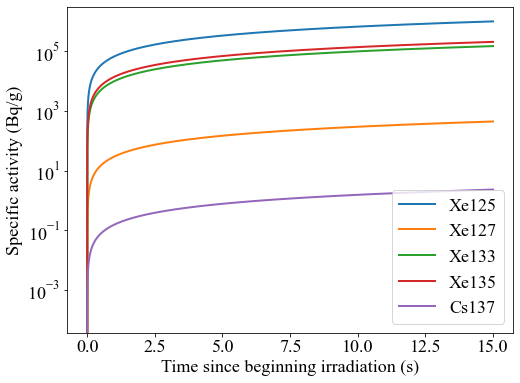

In [53]:
for isotope in NXe.keys():
    plt.plot(time/60.,SpecActivityXe[isotope],linewidth=2,label=isotope)

plt.yscale('log')
#plt.axis([-5.,100.,10.,1.e13])
plt.legend(loc='lower right')
plt.xlabel('Time since beginning irradiation (s)')
plt.ylabel('Specific activity (Bq/g)')

/Users/brianlenardo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


creation_int_ng_excitation: 4.072531641107091e-15
creation_int_n_excitation: 1.1176051191165033e-15


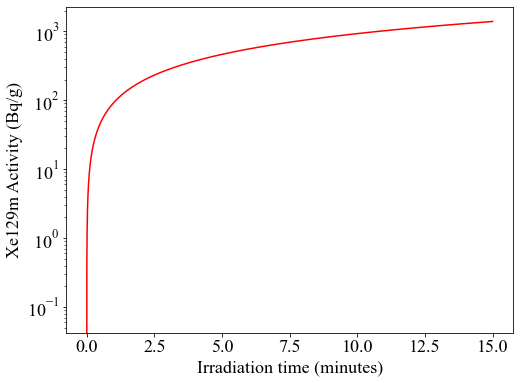

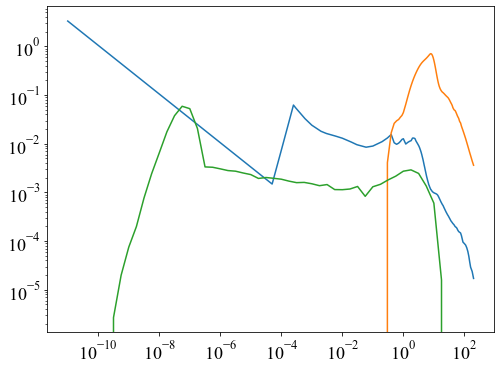

In [54]:
energy_values = np.logspace(-10.,2.,2000)


xe128_ng_excite = np.genfromtxt('CrossSections_copy/Xe128_ng_excite.txt')
xe129_n_excite = np.genfromtxt('CrossSections_copy/Xe129_n_excite.txt')

# TENDL neutron capture on Xe128
xe128_ng_excitation = {'energy':xe128_ng_excite[:,0],\
                       'cs':xe128_ng_excite[:,1]/1.e3}
xe128_ng_excitation = pd.DataFrame(xe128_ng_excitation)


# TENDL neutron inelastic to the level of interest
xe129_n_excitation = {'energy':xe129_n_excite[:,0],\
                       'cs':xe129_n_excite[:,1]/1.e3}
xe129_n_excitation = pd.DataFrame(xe129_n_excitation)

creation_int_ng_excitation,bin_by_bin_ng_excitation = Activation.InterpolateAndIntegrateAvg2( xe128_ng_excitation, mnrcspec )
creation_int_n_excitation,bin_by_bin_n_excitation = Activation.InterpolateAndIntegrateAvg2( xe129_n_excitation, mnrcspec )

print('creation_int_ng_excitation: {}'.format(creation_int_ng_excitation))
print('creation_int_n_excitation: {}'.format(creation_int_n_excitation))


NXe['Xe129m'] = np.zeros(len(time))
SpecActivityXe['Xe129m'] = np.zeros(len(time))

# Assume natural xenon
N129_0 = 1./131. * 0.264 * 6.02e23
N128_0 = 1./131. * 0.0191 * 6.02e23
N129m_0 = 0.
tau129m = 8.9 / np.log(2.) * 24. * 60. * 60.

# creation_int, bin_by_bin = Activation.InterpolateAndIntegrateAvg( inelastic_total_df, mnrcspec )
destruction_int = 0. #Activation.InterpolateAndIntegrate( inelastic_total_df, ambespec )

#print(creation_int)
#print(destruction_int)
#print(dt)  

for i in range(1,len(time)):
    term1 = -NXe['Xe129m'][i-1]/tau129m
    term2 = N129_0 * creation_int_n_excitation
    term3 = N128_0 * creation_int_ng_excitation
    term4 = -NXe['Xe129m'][i-1] * destruction_int
    NXe['Xe129m'][i] = NXe['Xe129m'][i-1] + dt * (term1 + term2 + term3 + term4)
    SpecActivityXe['Xe129m'][i] = NXe['Xe129m'][i]/tau129m
 # print(N127[i])

plt.figure(1)
plt.plot(time/60.,NXe['Xe129m']/tau129m,'-r')
plt.xlabel('Irradiation time (minutes)')
plt.ylabel('Xe129m Activity (Bq/g)')
plt.title('')
plt.xscale('linear')
plt.yscale('log')
#plt.axis([0.,30.,1.e-1,5.e3])   
plt.savefig('xe129m_mnrc_activation_vs_time.png',dpi=300)

plt.figure(2)
plt.plot(xe128_ng_excitation['energy'],xe128_ng_excitation['cs'])
plt.plot(xe129_n_excitation['energy'],xe129_n_excitation['cs'])
plt.plot(mnrcspec['Energy'],mnrcspec['Flux']/4.e11)
plt.xscale('log')
plt.yscale('log')
# # Just plot the total cs on the same energy scale as the spectrum earlier
# plt.figure(2)
# plt.plot(energy_values,total_cs_129,'-k',linewidth=3)
# plt.axis([5.e-10,15.,1.e-5,2.])
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Neutron energy (MeV)')
# plt.ylabel('Cross section (barns)')
# plt.savefig('xe129_total_inelasti_cs_levels_2thru16_energy_scale.png',dpi=300)

/Users/brianlenardo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


creation_int_ng_excitation: 1.1690945471029592e-14
creation_int_n_excitation: 2.1271881008340336e-15
Ending activity of Xe129m: 0.552 uCi
Ending activity of Xe131m: 1.024 uCi


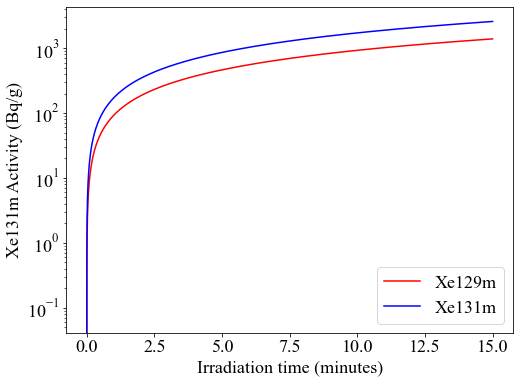

In [56]:
# energy_values = np.logspace(-10.,2.,2000)

# inelastic_total_df = pd.DataFrame()
# inelastic_total_df['Energy'] = energy_values
# inelastic_total_df['CS'] = total_cs_131
xe130_ng_excite = np.genfromtxt('CrossSections_copy/Xe130_ng_excite.txt')
xe131_n_excite = np.genfromtxt('CrossSections_copy/Xe131_n_excite.txt')

# TENDL neutron capture on Xe130
xe130_ng_excitation = {'energy':xe130_ng_excite[:,0],\
                       'cs':xe130_ng_excite[:,1]/1.e3}
xe130_ng_excitation = pd.DataFrame(xe130_ng_excitation)

# TENDL neutron inelastic to the level of interest
xe131_n_excitation = {'energy':xe131_n_excite[:,0],\
                       'cs':xe131_n_excite[:,1]/1.e3}
xe131_n_excitation = pd.DataFrame(xe131_n_excitation)

creation_int_ng_excitation,bin_by_bin_ng_excitation = Activation.InterpolateAndIntegrateAvg2( xe130_ng_excitation, mnrcspec )
creation_int_n_excitation,bin_by_bin_n_excitation = Activation.InterpolateAndIntegrateAvg2( xe131_n_excitation, mnrcspec )

print('creation_int_ng_excitation: {}'.format(creation_int_ng_excitation))
print('creation_int_n_excitation: {}'.format(creation_int_n_excitation))

NXe['Xe131m'] = np.zeros(len(time))
SpecActivityXe['Xe131m'] = np.zeros(len(time))

# Assume natural xenon.
N131_0 = 1./131. * 0.21232 * 6.02e23
N130_0 = 1./131. * 0.0407 * 6.02e23
N131m_0 = 0.
tau131m = 11.932 / np.log(2.) * 24. * 60. * 60.

#creation_int,bin_by_bin = Activation.InterpolateAndIntegrateAvg( inelastic_total_df, mnrcspec )


destruction_int = 0. #Activation.InterpolateAndIntegrate( inelastic_total_df, ambespec )

#print(creation_int)
#print(destruction_int)
#print(dt)  

for i in range(1,len(time)):
    term1 = -NXe['Xe131m'][i-1]/tau131m
    term2 = N131_0 * creation_int_n_excitation
    term3 = N130_0 * creation_int_ng_excitation
    term4 = -NXe['Xe131m'][i-1] * destruction_int
    NXe['Xe131m'][i] = NXe['Xe131m'][i-1] + dt * (term1 + term2 + term3 + term4)
    SpecActivityXe['Xe131m'][i] = NXe['Xe131m'][i]/tau131m
 # print(N127[i])

plt.figure(1)
plt.plot(time/60.,SpecActivityXe['Xe129m'],'-r',label='Xe129m')
plt.plot(time/60.,SpecActivityXe['Xe131m'],'-b',label='Xe131m')
plt.xlabel('Irradiation time (minutes)')
plt.ylabel('Xe131m Activity (Bq/g)')
plt.title('')
plt.xscale('linear')
plt.yscale('log')
plt.legend()
#plt.axis([0.,30.,1.e-1,5.e3])   
plt.savefig('xe131m_mnrc_activation_vs_time.png',dpi=300)
print('Ending activity of Xe129m: {:4.4} uCi'.format(SpecActivityXe['Xe129m'][-1]*70/37000*0.21))
print('Ending activity of Xe131m: {:4.4} uCi'.format(SpecActivityXe['Xe131m'][-1]*70/37000*0.21))



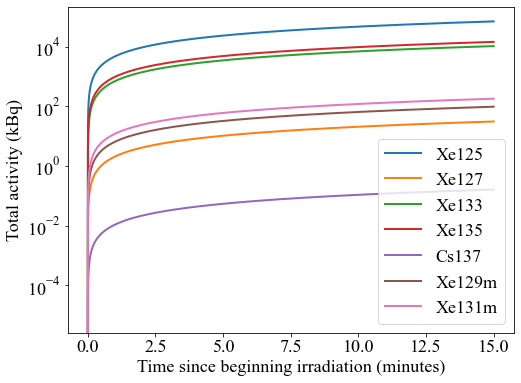

In [57]:
xenon_mass = 70. # grams
Bq_per_kBq = 1000.

for isotope in NXe.keys():
    plt.plot(time/60.,SpecActivityXe[isotope]*xenon_mass/Bq_per_kBq,linewidth=2,label=isotope)

plt.yscale('log')
#plt.axis([0.,,1.e-5,1.e4])
plt.legend(loc='lower right')
plt.xlabel('Time since beginning irradiation (minutes)')
plt.ylabel('Total activity (kBq)')
plt.savefig('total_activity_xenon_75g_gas_2min_irrad.png')

# What will be left after a 24hr cool-off period?

In [58]:
# First, get the color cycle.
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(len(color_cycle))
    

10


In [59]:
# Need a dict with the half-lives
Halflives = dict()

# This adds the Xe halflives
for index, row in xe_table.iterrows():
    if 'None' in row['Daughter radiation']: continue
    if row['Daughter halflife (s)'] < 1.*60.*60.: continue
 
    daughter = '{}{}'.format(row['Element'],row['A']+1)
    
    Halflives[daughter] = row['Daughter halflife (s)'] / np.log(2)

Halflives['Xe131m'] = 11.932*24.*60*60. / np.log(2)
Halflives['Xe129m'] = 8.9*24.*60.*60. / np.log(2)

# THis adds the steel-generated halflives
for index, row in stainless_table.iterrows():
    if 'None' in row['Daughter radiation']: continue
    if row['Daughter halflife (s)'] < 1.*60.*60.: continue
 
    if row['Reaction']=='ng':
        daughter = '{}{}'.format(row['Element'],row['A']+1)
    if row['Reaction']=='np':
        daughter = '{}{}'.format(row['Daughter decay product'],row['A'])
    
    Halflives[daughter] = row['Daughter halflife (s)'] / np.log(2)

Halflives['Cs137'] = 951441120. / np.log(2)

for key,val in Halflives.items():
    print('{}\t{:5.5} s\t{:5.5} days'.format(key,val,val/60./60./24.))

Xe125	8.7774e+04 s	1.0159 days
Xe127	4.5304e+06 s	52.435 days
Xe133	6.5403e+05 s	7.5698 days
Xe135	4.747e+04 s	0.54943 days
Xe137	1.3726e+09 s	1.5887e+04 days
Xe131m	1.4873e+06 s	17.214 days
Xe129m	1.1094e+06 s	12.84 days
Fe55	1.2421e+08 s	1437.6 days
Fe59	5.5593e+06 s	64.344 days
Co58	8.8326e+06 s	102.23 days
Co60	2.3983e+08 s	2775.8 days
Ni63	4.5497e+09 s	5.2658e+04 days
Ni65	1.2984e+04 s	0.15028 days
Mo93	1.3213e+11 s	1.5293e+06 days
Mo99	3.4247e+05 s	3.9638 days
Cr51	3.4531e+06 s	39.966 days
S35	1.0884e+07 s	125.98 days
P32	1.78e+06 s	20.602 days
Si31	1.3607e+04 s	0.15749 days
C14	2.607e+11 s	3.0173e+06 days
Cs137	1.3726e+09 s	1.5887e+04 days


Xe133 activity at end: 7.03e+03 kBq


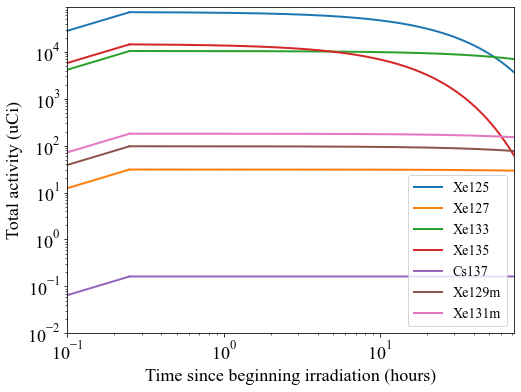

In [60]:
i=0

decay_time = np.linspace(0.,23.75+24.*2,100000)


for isotope in NXe.keys():
    plt.plot(time/60./60.,SpecActivityXe[isotope]*xenon_mass/Bq_per_kBq,linewidth=2,label=isotope,color=color_cycle[i])
    plt.plot((decay_time+0.25),(SpecActivityXe[isotope][-1]*xenon_mass/Bq_per_kBq)*np.exp(-decay_time*60.*60./Halflives[isotope]),linewidth=2,color=color_cycle[i])
    i=i+1

plt.yscale('log')
plt.xscale('log')
#plt.axis([-5.,100.,10.,1.e13])
plt.legend(loc='lower right',fontsize=14)
plt.xlabel('Time since beginning irradiation (hours)')
plt.ylabel('Total activity (uCi)')
plt.axis([0.1,72.,0.01,9e4])
#plt.title('Activity in 50g Xe gas from 1hr irradiation',fontsize=18)
plt.savefig('xenon_activity_mnrc_bottle_30minIrradiation_72hrsCooloff.png',dpi=300)
print('Xe133 activity at end: {:3.3} kBq'.format((SpecActivityXe['Xe133'][-1]*xenon_mass/Bq_per_kBq)*np.exp(-decay_time[-1]*60.*60./Halflives['Xe133'])))



/var/folders/g2/wbtqb3xs5ll9pqwt151g32500000gp/T/ipykernel_50887/433173965.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Xe127','Assay Result':5720./1000.}, ignore_index=True )
/var/folders/g2/wbtqb3xs5ll9pqwt151g32500000gp/T/ipykernel_50887/433173965.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Xe129m','Assay Result':1.37e5/1000.}, ignore_index=True )
/var/folders/g2/wbtqb3xs5ll9pqwt151g32500000gp/T/ipykernel_50887/433173965.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Xe131m','Assay Result':1.87e5/1000.}, ignore_inde

  Isotope Assay Result
0   Xe127         5.72
1  Xe129m        137.0
2  Xe131m        187.0
3   Cs137     0.000314
4   Xe133       1605.0
  Isotope Assay Result
0   Xe127         5.72
1  Xe129m        137.0
2  Xe131m        187.0
3   Cs137     0.000314
4   Xe133       1605.0
Isotope: Xe125	Initial activity: 7.0274e+04
Isotope: Xe127	Initial activity: 31.08
Isotope: Xe133	Initial activity: 1.0436e+04
Isotope: Xe135	Initial activity: 1.4471e+04
Isotope: Cs137	Initial activity: 0.16291
Isotope: Xe129m	Initial activity: 97.258
Isotope: Xe131m	Initial activity: 180.48
Xe133 activity at end: 0.0168 kBq


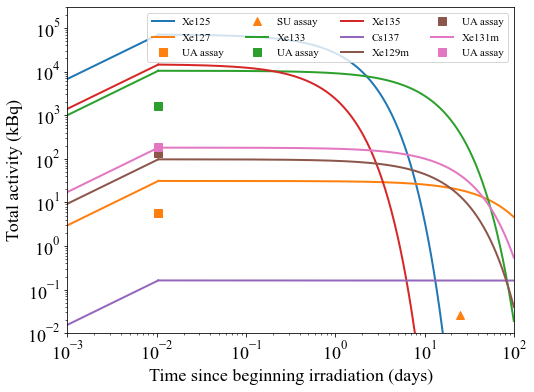

In [61]:
i=0

# xe_assay_results_ua = pd.DataFrame(columns=['Isotope','Assay Result'])
# # xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Xe127','Assay Result':0.0916}, ignore_index=True )
# # xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Xe129m','Assay Result':2.22}, ignore_index=True )
# # xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Xe131m','Assay Result':2.73}, ignore_index=True )
# # xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Cs137','Assay Result':6.2e-6}, ignore_index=True )
# # print(xe_assay_results_ua.head())

xe_assay_results_ua = pd.DataFrame(columns=['Isotope','Assay Result'])
xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Xe127','Assay Result':5720./1000.}, ignore_index=True )
xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Xe129m','Assay Result':1.37e5/1000.}, ignore_index=True )
xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Xe131m','Assay Result':1.87e5/1000.}, ignore_index=True )
xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Cs137','Assay Result':0.314/1000}, ignore_index=True )
xe_assay_results_ua = xe_assay_results_ua.append( {'Isotope':'Xe133','Assay Result':3.21e6/1000/2.}, ignore_index=True )
print(xe_assay_results_ua.head())

xe_assay_results_su = pd.DataFrame(columns=['Isotope','Assay Result'])
xe_assay_results_su = xe_assay_results_su.append( {'Isotope':'Xe127','Assay Result':0.026}, ignore_index=True )
#xe_assay_results_su = xe_assay_results_su.append( {'Isotope':'Xe129m','Assay Result':2.22}, ignore_index=True )
#xe_assay_results_su = xe_assay_results_su.append( {'Isotope':'Xe131m','Assay Result':2.73}, ignore_index=True )
#xe_assay_results_su = xe_assay_results_su.append( {'Isotope':'Cs137','Assay Result':6.2e-6}, ignore_index=True )
print(xe_assay_results_ua.head())


decay_time = np.linspace(0.,23.75+24.*100,100000)
prediction_scale = 1. #0.2 #0.5

for isotope in NXe.keys():

    assay_ua_mask = (xe_assay_results_ua['Isotope']==isotope)
    assay_su_mask = (xe_assay_results_su['Isotope']==isotope)
    
    plt.plot(time/60./60./24,SpecActivityXe[isotope]*xenon_mass/Bq_per_kBq*prediction_scale,linewidth=2,label=isotope,color=color_cycle[i])
    plt.plot((decay_time+0.25)/24,(SpecActivityXe[isotope][-1]*xenon_mass/Bq_per_kBq)*np.exp(-decay_time*60.*60./Halflives[isotope])*prediction_scale,linewidth=2,color=color_cycle[i])
    print('Isotope: {}\tInitial activity: {:5.5}'.format(isotope,\
                                    SpecActivityXe[isotope][-1]*xenon_mass/Bq_per_kBq))
    
    if len(xe_assay_results_ua['Assay Result'].loc[assay_ua_mask])>0 and 'Cs137' not in isotope:
        plt.plot(0.25/24.,xe_assay_results_ua['Assay Result'].loc[assay_ua_mask],'s',\
                     color=color_cycle[i],markersize=8,label='UA assay')
    if len(xe_assay_results_su['Assay Result'].loc[assay_su_mask])>0 and 'Cs137' not in isotope:
        plt.plot(25.,xe_assay_results_su['Assay Result'].loc[assay_su_mask],'^',\
                     color=color_cycle[i],markersize=8,label='SU assay')
    
    
    i=i+1

plt.yscale('log')
plt.xscale('log')
#plt.axis([-5.,100.,10.,1.e13])
plt.legend(loc='upper right',fontsize=11,ncol=4)
plt.xlabel('Time since beginning irradiation (days)')
plt.ylabel('Total activity (kBq)')
plt.axis([0.001,100.,0.01,3e5])
#plt.title('Activity in 50g Xe gas from 1hr irradiation',fontsize=18)
plt.savefig('xenon_activity_mnrc_bottle_15minIrradiation_100daysCooloff.png',dpi=300)
print('Xe133 activity at end: {:3.3} kBq'.format((SpecActivityXe['Xe133'][-1]*xenon_mass/Bq_per_kBq)*np.exp(-decay_time[-1]*60.*60./Halflives['Xe133'])))


Final activity of Cr-51: 18343.468895985206
Final activity of Fe-59: 266.9881536112055


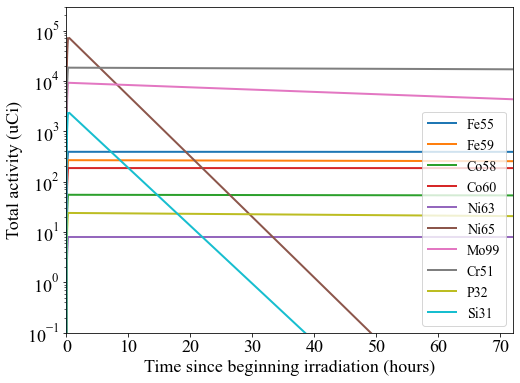

In [62]:
i=0
decay_time = np.linspace(0.,23.5 + 2.*24.,100000)


for isotope in NSteel.keys():
    if np.max(SpecActivitySteel[isotope]*924./Bq_per_uCi) < 1.e-2: continue
    if i>9: i=i-10
    plt.plot(time/60./60.,SpecActivitySteel[isotope]*924./Bq_per_kBq,linewidth=2,label=isotope,color=color_cycle[i])
    plt.plot((decay_time+0.5),SpecActivitySteel[isotope][-1]*np.exp(-decay_time*60.*60./Halflives[isotope])*924./Bq_per_kBq,linewidth=2,color=color_cycle[i])
    i=i+1

plt.yscale('log')
#plt.axis([-5.,100.,10.,1.e13])
plt.legend(loc='lower right',fontsize=14)
plt.xlabel('Time since beginning irradiation (hours)')
plt.ylabel('Total activity (uCi)')
plt.axis([0.,72.,0.1,3e5])
#plt.title('Activity in 924g stainless steel from 1hr irradiation',fontsize=18)
plt.savefig('stainless_activity_mnrc_bottle_30minIrradiation_72hrsCooloff.png',dpi=300)

print('Final activity of Cr-51: {}'.format(SpecActivitySteel['Cr51'][-1]*924./Bq_per_kBq))
print('Final activity of Fe-59: {}'.format(SpecActivitySteel['Fe59'][-1]*924./Bq_per_kBq))

10
  Isotope Assay Result
0    Cr51        235.0
1    Co58        0.887
2    Fe59         3.18
3    Co60         4.35
  Isotope Assay Result
0    Cr51         80.0
1    Co58        0.306
2    Fe59         1.64
3    Co60          2.4
  Isotope Assay Result
0    Cr51        45.74
1    Co58       0.2189
2    Fe59        1.086
3    Co60          2.0



Isotope:  Predicted  Assay @    Ratio @    Predicted  Assay @    Ratio @    Predicted  Assay @    Ratio @   
          9 days     9 days     9 days     29 days    29 days    29 days    25 days    25 days    25 days   


/var/folders/g2/wbtqb3xs5ll9pqwt151g32500000gp/T/ipykernel_50887/1458227416.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  assay_results_test = assay_results_test.append( {'Isotope':'Cr51','Assay Result':235.}, ignore_index=True )
/var/folders/g2/wbtqb3xs5ll9pqwt151g32500000gp/T/ipykernel_50887/1458227416.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  assay_results_test = assay_results_test.append( {'Isotope':'Co58','Assay Result':0.887}, ignore_index=True )
/var/folders/g2/wbtqb3xs5ll9pqwt151g32500000gp/T/ipykernel_50887/1458227416.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  assay_results_test = assay_results_test.append( {'Isotope':'Fe59','Assay Result':3.18}, ignore_index=True )
/var/folders/g2/wbtqb3xs

Fe59      6.274      1.64       3.826      4.598      3.18       1.446      4.893      1.086      4.505     
Co58      1.358      0.306      4.439      1.117      0.887      1.259      1.161      0.2189     5.306     
Cr51      395.8      80.0       4.948      240.0      235.0      1.021      265.2      45.74      5.799     


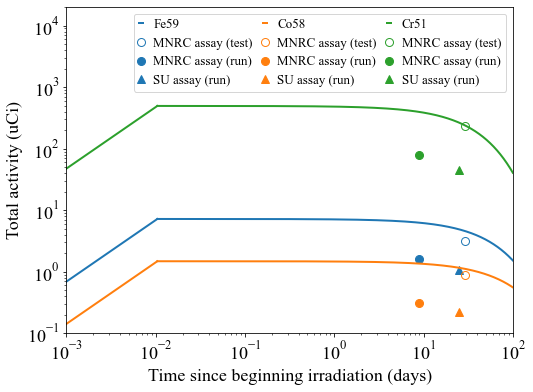

In [65]:
i=0
print(len(color_cycle))

assay_results_test = pd.DataFrame(columns=['Isotope','Assay Result'])
assay_results_test = assay_results_test.append( {'Isotope':'Cr51','Assay Result':235.}, ignore_index=True )
assay_results_test = assay_results_test.append( {'Isotope':'Co58','Assay Result':0.887}, ignore_index=True )
assay_results_test = assay_results_test.append( {'Isotope':'Fe59','Assay Result':3.18}, ignore_index=True )
assay_results_test = assay_results_test.append( {'Isotope':'Co60','Assay Result':4.35}, ignore_index=True )
print(assay_results_test.head())

assay_results_run = pd.DataFrame(columns=['Isotope','Assay Result'])
assay_results_run = assay_results_run.append( {'Isotope':'Cr51','Assay Result':80.}, ignore_index=True )
assay_results_run = assay_results_run.append( {'Isotope':'Co58','Assay Result':0.306}, ignore_index=True )
assay_results_run = assay_results_run.append( {'Isotope':'Fe59','Assay Result':1.64}, ignore_index=True )
assay_results_run = assay_results_run.append( {'Isotope':'Co60','Assay Result':2.4}, ignore_index=True )
print(assay_results_run.head())

assay_results_su = pd.DataFrame(columns=['Isotope','Assay Result'])
assay_results_su = assay_results_su.append( {'Isotope':'Cr51','Assay Result':45.74}, ignore_index=True )
assay_results_su = assay_results_su.append( {'Isotope':'Co58','Assay Result':0.2189}, ignore_index=True )
assay_results_su = assay_results_su.append( {'Isotope':'Fe59','Assay Result':1.086}, ignore_index=True )
assay_results_su = assay_results_su.append( {'Isotope':'Co60','Assay Result':2.0}, ignore_index=True )
print(assay_results_su.head())


decay_time = np.linspace(0.,23.75+24.*100,100000)

print('\n\n')

print('{:<9} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}'.format(\
                    'Isotope:','Predicted','Assay @','Ratio @','Predicted',\
                    'Assay @','Ratio @','Predicted',\
                    'Assay @','Ratio @'))
print('{:<9} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}'.format(\
                    '','9 days','9 days','9 days','29 days',\
                    '29 days','29 days','25 days',\
                    '25 days','25 days'))

prediction_scale = 1. # 0.3 #0.2

for isotope in NSteel.keys():
    if 'Co58' not in isotope and \
       'Cr51' not in isotope and \
       'Fe59' not in isotope:
        continue
        
    assay_test_mask = (assay_results_test['Isotope']==isotope)
    assay_run_mask = (assay_results_run['Isotope']==isotope)
    assay_su_mask = (assay_results_su['Isotope']==isotope)

    if np.max(SpecActivitySteel[isotope]*924./Bq_per_uCi) < 1.e-2: continue
    if i>9: i=i-10
    plt.plot(time/60./60./24,SpecActivitySteel[isotope]*924./Bq_per_uCi*prediction_scale,linewidth=2,label=isotope,color=color_cycle[i])
    plt.plot((decay_time+0.25)/24,(SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*np.exp(-decay_time*60.*60./Halflives[isotope])*prediction_scale,linewidth=2,color=color_cycle[i])

        #plt.plot(ship_delay,\
        #        andreas['Initial activity [Bq] after irradiation time t [h] and after shipping delay.1'].loc[andreas_mask],'^',markersize=6,color=color_cycle[i],label='')
        #plt.plot(inter_delay,\
        #        andreas['Initial activity [Bq] after irradiation time t [h] and after interme-diate delay.1'].loc[andreas_mask],'^',markersize=6,color=color_cycle[i],label='')
        #plt.plot(long_delay,\
        #        andreas['Initial activity [Bq] after irradiation time t [h] and after long delay.1'].loc[andreas_mask],'^',markersize=6,color=color_cycle[i],label='')
    if len(assay_results_test['Assay Result'].loc[assay_test_mask])>0:
            #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
        plt.plot(29.,assay_results_test['Assay Result'].loc[assay_test_mask],'o',\
                     markeredgecolor=color_cycle[i],markersize=8,\
                 markerfacecolor=(1.,1.,1.,0.),label='MNRC assay (test)')
    if len(assay_results_run['Assay Result'].loc[assay_run_mask])>0:
            #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
        plt.plot(9.,assay_results_run['Assay Result'].loc[assay_run_mask],'o',\
                     color=color_cycle[i],markersize=8,label='MNRC assay (run)')
    if len(assay_results_su['Assay Result'].loc[assay_su_mask])>0:
            #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
        plt.plot(25.,assay_results_su['Assay Result'].loc[assay_su_mask],'^',\
                     color=color_cycle[i],markersize=8,label='SU assay (run)')

        
    pred_idx_9days = np.where(decay_time > 9*24)[0][0]
    pred_act_9days = (SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*\
                                np.exp(-decay_time[pred_idx_9days]*60.*60./Halflives[isotope])
    assay_9days = assay_results_run['Assay Result'].loc[assay_run_mask].values[0]
    
    pred_idx_29days = np.where( decay_time > 29*24)[0][0]
    pred_act_29days = (SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*\
                                np.exp(-decay_time[pred_idx_29days]*60.*60./Halflives[isotope])
    assay_29days = assay_results_test['Assay Result'].loc[assay_test_mask].values[0]
    assay_29days = assay_results_test['Assay Result'].loc[assay_test_mask].values[0]
    
    pred_idx_25days = np.where( decay_time > 25*24)[0][0]
    pred_act_25days = (SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*\
                                np.exp(-decay_time[pred_idx_25days]*60.*60./Halflives[isotope])
    assay_25days = assay_results_su['Assay Result'].loc[assay_su_mask].values[0]
    assay_25days = assay_results_su['Assay Result'].loc[assay_su_mask].values[0]

    
    print('{:<9} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4}'.format(isotope,\
            pred_act_9days, assay_9days, pred_act_9days/assay_9days, pred_act_29days, \
            assay_29days, pred_act_29days/assay_29days,pred_act_25days,assay_25days, \
            pred_act_25days/assay_25days))
#     print('{:<9} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4}'.format(isotope,\
#             pred_act_9days, assay_9days, pred_act_9days/assay_9days, pred_act_29days, \
#             assay_29days, pred_act_29days/assay_29days,pred_act_25days,assay_25days, \
#             pred_act_25days/assay_25days))
    
    i=i+1

plt.yscale('log')
plt.xscale('log')
#plt.axis([-5.,100.,10.,1.e13])
plt.legend(loc='upper right',fontsize=13,ncol=3,columnspacing=0.8,handlelength=0.3)
plt.xlabel('Time since beginning irradiation (days)')
plt.ylabel('Total activity (uCi)')
plt.axis([0.001,100.,0.1,2e4])
#plt.title('Activity in 50g Xe gas from 1hr irradiation',fontsize=18)
plt.savefig('stainless_activity_mnrc_bottle_15minIrradiation_100daysCooloff.png',dpi=300)
#print('Xe133 activity at end: {:3.3} uCi'.format((SpecActivityXe['Xe133'][-1]*924./Bq_per_uCi)*np.exp(-decay_time[-1]*60.*60./Halflives['Xe133'])))


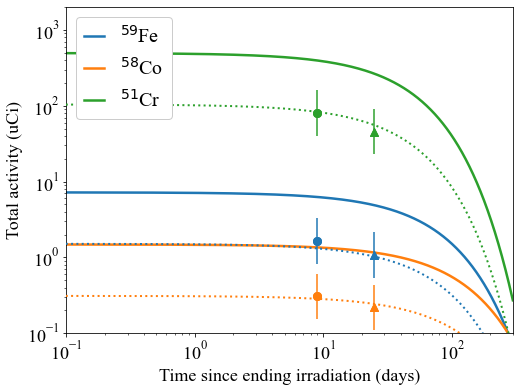

In [66]:
i=0
zorder_counter = 0


decay_time = np.linspace(0.,23.75+24.*365,100000)


prediction_scale = 1. 

isotopes_dict = {'Co58':'$^{58}$Co',\
                'Cr51':'$^{51}$Cr',\
                'Fe59':'$^{59}$Fe'}

isotopes_zorder = {}

for isotope in NSteel.keys():
    if 'Co58' not in isotope and \
       'Cr51' not in isotope and \
       'Fe59' not in isotope:
        continue
        

   
    assay_test_mask = (assay_results_test['Isotope']==isotope)
    assay_run_mask = (assay_results_run['Isotope']==isotope)
    assay_su_mask = (assay_results_su['Isotope']==isotope)
        

    if np.max(SpecActivitySteel[isotope]*924./Bq_per_uCi) < 1.e-2: continue
    if i>9: i=i-10
    #plt.plot(time/60./60./24-0.25,SpecActivitySteel[isotope]*924./Bq_per_uCi*prediction_scale,linewidth=2,color=color_cycle[i])
    plt.plot((decay_time)/24,(SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*np.exp(-decay_time*60.*60./Halflives[isotope])*prediction_scale,\
             linewidth=2.5,\
             color=color_cycle[i],\
            label=isotopes_dict[isotope],\
            zorder=zorder_counter-3)
    plt.plot((decay_time)/24,0.21*(SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*np.exp(-decay_time*60.*60./Halflives[isotope])*prediction_scale,\
             ':',linewidth=2,\
             color=color_cycle[i],\
            zorder=zorder_counter+3)
#     zorder_counter += 1

#     if len(assay_results_test['Assay Result'].loc[assay_test_mask])>0:
#             #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
#         plt.plot(29.,assay_results_test['Assay Result'].loc[assay_test_mask],'o',\
#                      markeredgecolor=color_cycle[i],markersize=8,\
#                  markerfacecolor=(1.,1.,1.,0.),label='MNRC assay (test)')
#     if len(assay_results_run['Assay Result'].loc[assay_run_mask])>0:
#             #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
#         plt.errorbar(9.,assay_results_run['Assay Result'].loc[assay_run_mask],\
#                      yerr=[ assay_results_run['Assay Result'].loc[assay_run_mask]*0.5,\
#                            assay_results_run['Assay Result'].loc[assay_run_mask] ],\
#                      fmt='o',\
#                      color=color_cycle[i],markersize=8)
#         plt.plot(9.,assay_results_run['Assay Result'].loc[assay_run_mask],\
#                      'o',\
#                      color=color_cycle[i],markersize=8,label='MNRC assay')
#                      #zorder=zorder_counter)
# #         zorder_counter += 1
#     if len(assay_results_su['Assay Result'].loc[assay_su_mask])>0:
#             #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
#         plt.errorbar(25.,assay_results_su['Assay Result'].loc[assay_su_mask],\
#                      yerr=[ assay_results_su['Assay Result'].loc[assay_su_mask]*0.5,\
#                            assay_results_su['Assay Result'].loc[assay_su_mask] ],\
#                      fmt='^',\
#                      color=color_cycle[i],markersize=8)#,\
#         plt.plot(25.,assay_results_su['Assay Result'].loc[assay_su_mask],\
#                      '^',\
#                      color=color_cycle[i],markersize=8,label='SU assay')#,\
        
    if len(assay_results_run['Assay Result'].loc[assay_run_mask])>0:
            #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
        plt.errorbar(9.,assay_results_run['Assay Result'].loc[assay_run_mask],\
                     yerr=[ assay_results_run['Assay Result'].loc[assay_run_mask]*0.5,\
                           assay_results_run['Assay Result'].loc[assay_run_mask] ],\
                     fmt='o',\
                     color=color_cycle[i],markersize=8)
        plt.plot(9.,assay_results_run['Assay Result'].loc[assay_run_mask],\
                     'o',\
                     color=color_cycle[i],markersize=8)
                     #zorder=zorder_counter)
#         zorder_counter += 1
    if len(assay_results_su['Assay Result'].loc[assay_su_mask])>0:
            #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
        plt.errorbar(25.,assay_results_su['Assay Result'].loc[assay_su_mask],\
                     yerr=[ assay_results_su['Assay Result'].loc[assay_su_mask]*0.5,\
                           assay_results_su['Assay Result'].loc[assay_su_mask] ],\
                     fmt='^',\
                     color=color_cycle[i],markersize=8)#,\
        plt.plot(25.,assay_results_su['Assay Result'].loc[assay_su_mask],\
                     '^',\
                     color=color_cycle[i],markersize=8)#,\
                     #zorder=zorder_counter+3)
    zorder_counter += 1

        
#     pred_idx_9days = np.where(decay_time > 9*24)[0][0]
#     pred_act_9days = (SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*\
#                                 np.exp(-decay_time[pred_idx_9days]*60.*60./Halflives[isotope])
#     assay_9days = assay_results_run['Assay Result'].loc[assay_run_mask].values[0]
    
#     pred_idx_29days = np.where( decay_time > 29*24)[0][0]
#     pred_act_29days = (SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*\
#                                 np.exp(-decay_time[pred_idx_29days]*60.*60./Halflives[isotope])
#     assay_29days = assay_results_test['Assay Result'].loc[assay_test_mask].values[0]
#     assay_29days = assay_results_test['Assay Result'].loc[assay_test_mask].values[0]
    
#     pred_idx_25days = np.where( decay_time > 25*24)[0][0]
#     pred_act_25days = (SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*\
#                                 np.exp(-decay_time[pred_idx_25days]*60.*60./Halflives[isotope])
#     assay_25days = assay_results_su['Assay Result'].loc[assay_su_mask].values[0]
#     assay_25days = assay_results_su['Assay Result'].loc[assay_su_mask].values[0]

    
#     print('{:<9} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4}'.format(isotope,\
#             pred_act_9days, assay_9days, pred_act_9days/assay_9days, pred_act_29days, \
#             assay_29days, pred_act_29days/assay_29days,pred_act_25days,assay_25days, \
#             pred_act_25days/assay_25days))
#     print('{:<9} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4}'.format(isotope,\
#             pred_act_9days, assay_9days, pred_act_9days/assay_9days, pred_act_29days, \
#             assay_29days, pred_act_29days/assay_29days,pred_act_25days,assay_25days, \
#             pred_act_25days/assay_25days))
    
    i=i+1

plt.yscale('log')
plt.xscale('log')
#plt.axis([-5.,100.,10.,1.e13])
plt.legend(loc='upper left',fontsize=20,ncol=1,columnspacing=0.8,handlelength=1.0,framealpha=1.)
plt.xlabel('Time since ending irradiation (days)')
plt.ylabel('Total activity (uCi)')
plt.axis([0.1,300.,0.1,2e3])
#plt.title('Activity in 50g Xe gas from 1hr irradiation',fontsize=18)
plt.savefig('stainless_activity_mnrc_bottle_15minIrradiation_365daysCooloff.png',dpi=300)
#print('Xe133 activity at end: {:3.3} uCi'.format((SpecActivityXe['Xe133'][-1]*924./Bq_per_uCi)*np.exp(-decay_time[-1]*60.*60./Halflives['Xe133'])))

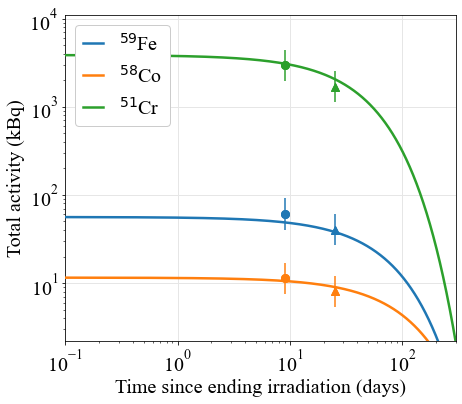

In [67]:
i=0
zorder_counter = 0

plt.rcParams['figure.figsize'] = [7, 6]
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Times New Roman'


decay_time = np.linspace(0.,23.75+24.*365,100000)


prediction_scale = 1. 

isotopes_dict = {'Co58':'$^{58}$Co',\
                'Cr51':'$^{51}$Cr',\
                'Fe59':'$^{59}$Fe'}

isotopes_zorder = {}

for isotope in NSteel.keys():
    if 'Co58' not in isotope and \
       'Cr51' not in isotope and \
       'Fe59' not in isotope:
        continue
        

   
    assay_test_mask = (assay_results_test['Isotope']==isotope)
    assay_run_mask = (assay_results_run['Isotope']==isotope)
    assay_su_mask = (assay_results_su['Isotope']==isotope)
        

    if np.max(SpecActivitySteel[isotope]*924./Bq_per_kBq) < 1.e-2: continue
    if i>9: i=i-10
    #plt.plot(time/60./60./24-0.25,SpecActivitySteel[isotope]*924./Bq_per_uCi*prediction_scale,linewidth=2,color=color_cycle[i])
#     plt.plot((decay_time)/24,(SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*np.exp(-decay_time*60.*60./Halflives[isotope])*prediction_scale,\
#              linewidth=2.5,\
#              color=color_cycle[i],\
#             label=isotopes_dict[isotope],\
#             zorder=zorder_counter-3)
    plt.plot((decay_time)/24,0.21*(SpecActivitySteel[isotope][-1]*924./Bq_per_kBq)*np.exp(-decay_time*60.*60./Halflives[isotope])*prediction_scale,\
             '-',linewidth=2.5,\
             color=color_cycle[i],\
            zorder=zorder_counter+3,label=isotopes_dict[isotope])
#     zorder_counter += 1

#     if len(assay_results_test['Assay Result'].loc[assay_test_mask])>0:
#             #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
#         plt.plot(29.,assay_results_test['Assay Result'].loc[assay_test_mask],'o',\
#                      markeredgecolor=color_cycle[i],markersize=8,\
#                  markerfacecolor=(1.,1.,1.,0.),label='MNRC assay (test)')
#     if len(assay_results_run['Assay Result'].loc[assay_run_mask])>0:
#             #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
#         plt.errorbar(9.,assay_results_run['Assay Result'].loc[assay_run_mask],\
#                      yerr=[ assay_results_run['Assay Result'].loc[assay_run_mask]*0.5,\
#                            assay_results_run['Assay Result'].loc[assay_run_mask] ],\
#                      fmt='o',\
#                      color=color_cycle[i],markersize=8)
#         plt.plot(9.,assay_results_run['Assay Result'].loc[assay_run_mask],\
#                      'o',\
#                      color=color_cycle[i],markersize=8,label='MNRC assay')
#                      #zorder=zorder_counter)
# #         zorder_counter += 1
#     if len(assay_results_su['Assay Result'].loc[assay_su_mask])>0:
#             #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
#         plt.errorbar(25.,assay_results_su['Assay Result'].loc[assay_su_mask],\
#                      yerr=[ assay_results_su['Assay Result'].loc[assay_su_mask]*0.5,\
#                            assay_results_su['Assay Result'].loc[assay_su_mask] ],\
#                      fmt='^',\
#                      color=color_cycle[i],markersize=8)#,\
#         plt.plot(25.,assay_results_su['Assay Result'].loc[assay_su_mask],\
#                      '^',\
#                      color=color_cycle[i],markersize=8,label='SU assay')#,\
    scale_factor = 37
        
    if len(assay_results_run['Assay Result'].loc[assay_run_mask])>0:
            #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
        plt.errorbar(9.,assay_results_run['Assay Result'].loc[assay_run_mask]*scale_factor,\
                     yerr=[ assay_results_run['Assay Result'].loc[assay_run_mask]*(1-1/1.5)*scale_factor,\
                           assay_results_run['Assay Result'].loc[assay_run_mask]*0.5*scale_factor ],\
                     fmt='o',\
                     color=color_cycle[i],markersize=8)
        plt.plot(9.,assay_results_run['Assay Result'].loc[assay_run_mask]*scale_factor,\
                     'o',\
                     color=color_cycle[i],markersize=8)
                     #zorder=zorder_counter)
#         zorder_counter += 1
    if len(assay_results_su['Assay Result'].loc[assay_su_mask])>0:
#         print(color_cycle[i])
#         print(assay_su_mask)
            #plt.plot(29.,assay_results['Assay Result'].loc[assay_mask],'s',markerfacecolor=(1.,1.,1.),color=color_cycle[i],label='',markersize=12)
        plt.errorbar(25.,assay_results_su['Assay Result'].loc[assay_su_mask]*scale_factor,\
                     yerr=[ assay_results_su['Assay Result'].loc[assay_su_mask]*(1-1/1.5)*scale_factor,\
                           assay_results_su['Assay Result'].loc[assay_su_mask]*0.5*scale_factor ],\
                     fmt='^',\
                     color=color_cycle[i],markersize=8)#,\
        plt.plot(25.,assay_results_su['Assay Result'].loc[assay_su_mask]*scale_factor,\
                     '^',\
                     color=color_cycle[i],markersize=8)#,\
                     #zorder=zorder_counter+3)
    zorder_counter += 1

        
#     pred_idx_9days = np.where(decay_time > 9*24)[0][0]
#     pred_act_9days = (SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*\
#                                 np.exp(-decay_time[pred_idx_9days]*60.*60./Halflives[isotope])
#     assay_9days = assay_results_run['Assay Result'].loc[assay_run_mask].values[0]
    
#     pred_idx_29days = np.where( decay_time > 29*24)[0][0]
#     pred_act_29days = (SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*\
#                                 np.exp(-decay_time[pred_idx_29days]*60.*60./Halflives[isotope])
#     assay_29days = assay_results_test['Assay Result'].loc[assay_test_mask].values[0]
#     assay_29days = assay_results_test['Assay Result'].loc[assay_test_mask].values[0]
    
#     pred_idx_25days = np.where( decay_time > 25*24)[0][0]
#     pred_act_25days = (SpecActivitySteel[isotope][-1]*924./Bq_per_uCi)*\
#                                 np.exp(-decay_time[pred_idx_25days]*60.*60./Halflives[isotope])
#     assay_25days = assay_results_su['Assay Result'].loc[assay_su_mask].values[0]
#     assay_25days = assay_results_su['Assay Result'].loc[assay_su_mask].values[0]

    
#     print('{:<9} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4}'.format(isotope,\
#             pred_act_9days, assay_9days, pred_act_9days/assay_9days, pred_act_29days, \
#             assay_29days, pred_act_29days/assay_29days,pred_act_25days,assay_25days, \
#             pred_act_25days/assay_25days))
#     print('{:<9} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4} {:<10.4}'.format(isotope,\
#             pred_act_9days, assay_9days, pred_act_9days/assay_9days, pred_act_29days, \
#             assay_29days, pred_act_29days/assay_29days,pred_act_25days,assay_25days, \
#             pred_act_25days/assay_25days))
    
    i=i+1

plt.yscale('log')
plt.xscale('log')
#plt.axis([-5.,100.,10.,1.e13])
plt.legend(loc='upper left',fontsize=20,ncol=1,columnspacing=0.8,handlelength=1.0,framealpha=1.)
plt.xlabel('Time since ending irradiation (days)')
plt.ylabel('Total activity (kBq)')
plt.axis([0.1,300.,0.06*scale_factor,3e2*scale_factor])
plt.grid(color=(0.9,0.9,0.9,0.4),linewidth=1)
#plt.title('Activity in 50g Xe gas from 1hr irradiation',fontsize=18)
plt.savefig('stainless_activity_mnrc_bottle_15minIrradiation_365daysCooloff_kBq.png',dpi=300,bbox_inches='tight')
#print('Xe133 activity at end: {:3.3} uCi'.format((SpecActivityXe['Xe133'][-1]*924./Bq_per_uCi)*np.exp(-decay_time[-1]*60.*60./Halflives['Xe133'])))

# What will be left after a 2mo cool-off period?

Xe125 activity ---- Init: 1.48e+04 kBq	 1wk:   3.38 kBq	 1mo: 2.32e-17 kBq	 60 days: 9.15e-28 kBq
Xe127 activity ---- Init:   6.53 kBq	 1wk:   5.55 kBq	 1mo:   2.58 kBq	 60 days:   1.62 kBq
Xe133 activity ---- Init: 2.19e+03 kBq	 1wk: 7.12e+02 kBq	 1mo:   3.54 kBq	 60 days:  0.142 kBq
Xe135 activity ---- Init: 3.04e+03 kBq	 1wk: 0.000565 kBq	 1mo: 1.04e-35 kBq	 60 days: 6.02e-55 kBq
Cs137 activity ---- Init: 0.0342 kBq	 1wk: 0.0342 kBq	 1mo: 0.0341 kBq	 60 days: 0.0341 kBq
Xe129m activity ---- Init:   20.4 kBq	 1wk:   10.5 kBq	 1mo:  0.461 kBq	 60 days: 0.0693 kBq
Xe131m activity ---- Init:   37.9 kBq	 1wk:   23.1 kBq	 1mo:   2.24 kBq	 60 days:  0.546 kBq



Xe-127 activity at 30 days: 15493.928283 Bq
Xe-127 activity at 60 days: 7724.084063 Bq
Xe-127 activity at 90 days: 3850.635779 Bq



Xe-127 activity at 30 days: 15.493928 kBq
Xe-127 activity at 60 days: 7.724084 kBq
Xe-127 activity at 90 days: 3.850636 kBq
Xe-127 activity at 365 days: 29.467151 Bq


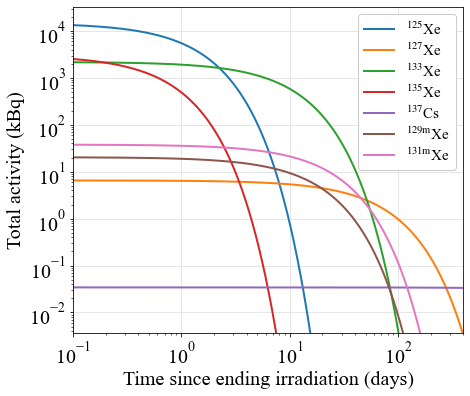

In [68]:
i=0
decay_time = np.linspace(0.,8760.*2,400000)


plt.rcParams['figure.figsize'] = [7, 6]
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Times New Roman'

# plt.rcParams.update({
#     "text.usetex": False})
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

isotopes_dict = {'Xe125':'$^{125}$Xe',\
                'Xe127':'$^{127}$Xe',\
                'Xe133':'$^{133}$Xe',\
                'Xe135':'$^{135}$Xe',\
                'Cs137':'$^{137}$Cs',\
                'Xe129m':'$^{129\mathrm{m}}$Xe',
                'Xe131m':'$^{131\mathrm{m}}$Xe'}

for isotope in NXe.keys():
    plt.plot((time-0.25)/60./60./24.,\
             SpecActivityXe[isotope]*xenon_mass/Bq_per_kBq*0.21,\
             linewidth=2,\
             label=isotopes_dict[isotope],\
             color=color_cycle[i])
    plt.plot((decay_time)/24.,\
             (SpecActivityXe[isotope][-1]*xenon_mass/Bq_per_kBq)*0.21*np.exp(-decay_time*60.*60./Halflives[isotope]),\
             linewidth=2,\
             color=color_cycle[i])
    wk_idx = int(200000.*(24.*7)/7200.)
    mo_idx = int(200000.*(24.*40.)/7200.)
    day60_idx =  int(200000.*(24.*60.)/7200.)
    print('{} activity ---- Init: {:>6.3} kBq\t 1wk: {:>6.3} kBq\t 1mo: {:>6.3} kBq\t 60 days: {:>6.3} kBq'.format(isotope, \
          SpecActivityXe[isotope][-1]*np.exp(-decay_time[0]*60.*60./Halflives[isotope])*xenon_mass/Bq_per_kBq*0.21, \
          SpecActivityXe[isotope][-1]*np.exp(-decay_time[wk_idx]*60.*60./Halflives[isotope])*xenon_mass/Bq_per_kBq*0.21, \
          SpecActivityXe[isotope][-1]*np.exp(-decay_time[mo_idx]*60.*60./Halflives[isotope])*xenon_mass/Bq_per_kBq*0.21, \
          SpecActivityXe[isotope][-1]*np.exp(-decay_time[day60_idx]*60.*60./Halflives[isotope])*xenon_mass/Bq_per_kBq*0.21))
#     print('{} activity ---- Init: {:>6.3} Bq\t 1wk: {:>6.3} Bq\t 1mo: {:>6.3} Bq\t 60 days: {:>6.3} Bq'.format(isotope, \
#           SpecActivityXe[isotope][-1]*np.exp(-decay_time[0]*60.*60./Halflives[isotope])*xenon_mass, \
#           SpecActivityXe[isotope][-1]*np.exp(-decay_time[wk_idx]*60.*60./Halflives[isotope])*xenon_mass, \
#           SpecActivityXe[isotope][-1]*np.exp(-decay_time[mo_idx]*60.*60./Halflives[isotope])*xenon_mass, \
#           SpecActivityXe[isotope][-1]*np.exp(-decay_time[day60_idx]*60.*60./Halflives[isotope])*xenon_mass))
    i=i+1

plt.yscale('log')
#plt.axis([-5.,100.,10.,1.e13])
leg = plt.legend(loc='upper right',fontsize=15,framealpha=1.,labelspacing=0.25,ncol=1)
#leg.set_title("Activation products\nfrom natural xenon", prop = {'size':18})
#leg._legend_box.align = "center"
textstr = 'Xe127 is longest-lived\n' +\
            'product and provides a\n408 keV ' +\
            'calibration line'
textstr = 'Xe127 is longest lived,\n' +\
            'produces 408 keV line'
#props = dict(boxstyle='square', facecolor='white', alpha=1.)
#plt.text(0.70, 0.78, textstr, transform=plt.gca().transAxes, fontsize=16,
#        verticalalignment='top',linespacing=1.4)#,bbox=props)
plt.xlabel('Time since ending irradiation (days)')
plt.ylabel('Total activity (kBq)')
plt.axis([0.1,400.,0.0001*scale_factor,9e2*scale_factor])
plt.xscale('log')
plt.grid(color=(0.9,0.9,0.9,0.4),linewidth=1)
#plt.title('Activity in 50g Xe gas from 1hr irradiation',fontsize=18)
plt.savefig('xe_activation_figure_for_365days_kBq.png',dpi=300,bbox_inches='tight')\

#index for 30 days:
idx30 = int(200000.*(24.*30.)/7200.)
idx60 = int(200000.*(24.*60.)/7200.)
idx90 = int(200000.*(24.*90.)/7200.)
idx365 = int(200000.*(24.*365.)/7200.)
print('\n\n')
print('Xe-127 activity at 30 days: {:1f} Bq'.format( (SpecActivityXe['Xe127'][-1]*xenon_mass)*np.exp(-decay_time[idx30]*60.*60./Halflives['Xe127'])))#/Bq_per_kBq))
print('Xe-127 activity at 60 days: {:1f} Bq'.format((SpecActivityXe['Xe127'][-1]*xenon_mass)*np.exp(-decay_time[idx60]*60.*60./Halflives['Xe127'])))#/Bq_per_kBq))
print('Xe-127 activity at 90 days: {:1f} Bq'.format((SpecActivityXe['Xe127'][-1]*xenon_mass)*np.exp(-decay_time[idx90]*60.*60./Halflives['Xe127'])))#/Bq_per_kBq))
print('\n\n')
print('Xe-127 activity at 30 days: {:1f} kBq'.format((SpecActivityXe['Xe127'][-1]*xenon_mass)*np.exp(-decay_time[idx30]*60.*60./Halflives['Xe127'])/Bq_per_kBq))
print('Xe-127 activity at 60 days: {:1f} kBq'.format((SpecActivityXe['Xe127'][-1]*xenon_mass)*np.exp(-decay_time[idx60]*60.*60./Halflives['Xe127'])/Bq_per_kBq))
print('Xe-127 activity at 90 days: {:1f} kBq'.format((SpecActivityXe['Xe127'][-1]*xenon_mass)*np.exp(-decay_time[idx90]*60.*60./Halflives['Xe127'])/Bq_per_kBq))

print('Xe-127 activity at 365 days: {:1f} Bq'.format((SpecActivityXe['Xe127'][-1]*xenon_mass)*np.exp(-(365.*24.)*60.*60./Halflives['Xe127'])))






Fe55  activity ------ 1wk: 3.89e+02  kBq --- 2wk: 3.88e+02  kBq --- 1mo: 3.79e+02  kBq
Fe59  activity ------ 1wk: 2.27e+02  kBq --- 2wk: 2.15e+02  kBq --- 1mo: 1.33e+02  kBq
Co58  activity ------ 1wk: 49.5      kBq --- 2wk: 47.9      kBq --- 1mo: 35.3      kBq
Co60  activity ------ 1wk: 1.85e+02  kBq --- 2wk: 1.85e+02  kBq --- 1mo: 1.83e+02  kBq
Ni63  activity ------ 1wk: 7.96      kBq --- 2wk: 7.96      kBq --- 1mo: 7.95      kBq
Ni65  activity ------ 1wk: 3.19e-26  kBq --- 2wk: 2.46e-36  kBq --- 1mo: 6.34e-126 kBq
Mo99  activity ------ 1wk: 6.49e+02  kBq --- 2wk: 2.68e+02  kBq --- 1mo: 0.108     kBq
Cr51  activity ------ 1wk: 1.41e+04  kBq --- 2wk: 1.29e+04  kBq --- 1mo: 5.95e+03  kBq
S35   activity ------ 1wk: 0.134     kBq --- 2wk: 0.13      kBq --- 1mo: 0.102     kBq
P32   activity ------ 1wk: 14.4      kBq --- 2wk: 12.1      kBq --- 1mo: 2.69      kBq
Si31  activity ------ 1wk: 2.56e-26  kBq --- 2wk: 5.72e-36  kBq --- 1mo: 1.87e-121 kBq


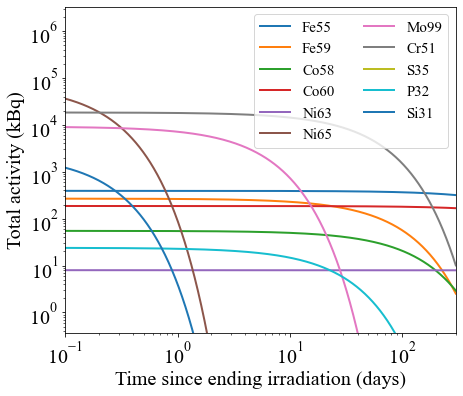

In [69]:
i=0
decay_time = np.linspace(0.,7200.,200000)

wk_idx = int(200000.*(24.*7)/7200.)
twowk_idx = int(200000.*(24.*14.)/7200.)
mo_idx = int(200000.*(24.*29.)/7200.)

for isotope in NSteel.keys():
    if np.max(SpecActivitySteel[isotope]*924./Bq_per_kBq) < 1.e-2: continue
    if i>9: i=i-10
    plt.plot((time-0.25)/60./60./24.,SpecActivitySteel[isotope]*bottle_mass/Bq_per_kBq,linewidth=2,label=isotope,color=color_cycle[i])
    plt.plot((decay_time)/24.,SpecActivitySteel[isotope][-1]*bottle_mass*np.exp(-decay_time*60.*60./Halflives[isotope])/Bq_per_kBq,linewidth=2,color=color_cycle[i])
    wk_idx = int(200000.*(24.*7.)/4800.)
    mo_idx = int(200000.*(24.*30.)/4800.)
    print('{:5} activity ------ 1wk: {:<9.3} kBq --- 2wk: {:<9.3} kBq --- 1mo: {:<9.3} kBq'.format(isotope, \
          SpecActivitySteel[isotope][-1]*np.exp(-decay_time[wk_idx]*60.*60./Halflives[isotope])*bottle_mass/Bq_per_kBq, \
          SpecActivitySteel[isotope][-1]*np.exp(-decay_time[twowk_idx]*60.*60./Halflives[isotope])*bottle_mass/Bq_per_kBq, \
          SpecActivitySteel[isotope][-1]*np.exp(-decay_time[mo_idx]*60.*60./Halflives[isotope])*bottle_mass/Bq_per_kBq))
    i=i+1

plt.yscale('log')
plt.xscale('log')
#plt.axis([-5.,100.,10.,1.e13])
plt.legend(loc='upper right',fontsize=15,ncol=2)
plt.xlabel('Time since ending irradiation (days)')
plt.ylabel('Total activity (kBq)')
plt.axis([0.1,300.,0.01*scale_factor,9e4*scale_factor])
#plt.title('Activity in 924g stainless steel from 1hr irradiation',fontsize=18)
plt.savefig('stainless_activity_mnrc_bottle_irradiation_200days_kBq.png',dpi=300)

